In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mushrooms_data = pd.read_csv('training_mush.csv')

In [3]:
mushrooms_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
mushrooms_data.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [5]:
y = mushrooms_data['class']
X = mushrooms_data.drop('class',axis = 1)

In [6]:
# постараться отобрать неколлерованные значения для наилучшего обучения в некст раз

In [7]:
# считая данные уже пройденными препроцессинг приступим к составлению рандомного леса,
clf_rf = RandomForestClassifier(random_state=0)

In [8]:
params = {'n_estimators' : [10,20,30,40,50], \
          'max_depth' : range(1,12,2), \
          'min_samples_leaf' : range(1,7), \
          'min_samples_split' : range(2,9,2) }

In [9]:
grid_search_cv_clf = GridSearchCV(clf_rf,params,cv=3,n_jobs=-1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': [10, 20, 30, 40, 50]})

In [12]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [13]:
best_clf = grid_search_cv_clf.best_estimator_

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
best_clf.score(X_test,y_test)

1.0

In [16]:
feature_importances = best_clf.feature_importances_

In [17]:
feature_importances_df = pd.DataFrame({'features' : list(X) , 'feature_ratio' : feature_importances}).sort_values('feature_ratio', ascending = False)
feature_importances_df 

,features,feature_ratio
4,odor,0.151801
8,gill-color,0.119645
10,stalk-root,0.096150
19,spore-print-color,0.093770
6,gill-spacing,0.080960
7,gill-size,0.077734
3,bruises,0.072998
18,ring-type,0.068802
20,population,0.038278
21,habitat,0.038129


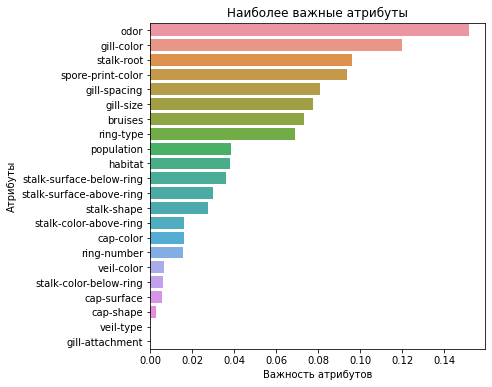

In [18]:
plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_ratio)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [19]:
mushrooms_test_df = pd.read_csv('testing_mush.csv')

In [20]:
mushrooms_test_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [21]:
pd.Series(best_clf.predict(mushrooms_test_df)).value_counts()

0    1055
1     976
dtype: int64

In [22]:
best_clf.predict(mushrooms_test_df).sum()

976

In [23]:
y_pred = best_clf.predict(mushrooms_test_df)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
y_true = pd.read_csv('testing_y_mush.csv')

In [26]:
confusion_matrix(y_true,y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

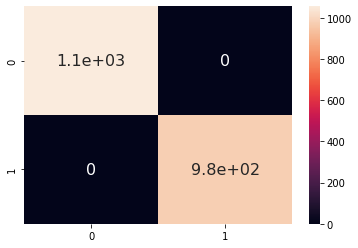

In [27]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,annot_kws={"size": 16})